**Table of contents**<a id='toc0_'></a>    
- [Motivation](#toc1_)    
- [Functionalities](#toc2_)    
  - [Create chemical reactions](#toc2_1_)    
  - [Create and simulate chemical reactors](#toc2_2_)    
- [Results](#toc3_)    
  - [Chemical reactions](#toc3_1_)    
    - [Creation of a chemical reaction](#toc3_1_1_)    
    - [Calculation of reaction rate](#toc3_1_2_)    
  - [Reactors modelisation](#toc3_2_)    
    - [Creation of chemical reactors](#toc3_2_1_)    
    - [Simulation of a 1st order chemical reaction](#toc3_2_2_)    
      - [Batch](#toc3_2_2_1_)    
      - [Fed-batch](#toc3_2_2_2_)    
      - [CSTR](#toc3_2_2_3_)    
      - [PFR](#toc3_2_2_4_)    
    - [Simulation of a 2nd order reaction](#toc3_2_3_)    
      - [Batch](#toc3_2_3_1_)    
      - [Fed-batch](#toc3_2_3_2_)    
      - [CSTR](#toc3_2_3_3_)    
      - [PFR](#toc3_2_3_4_)    
    - [Simulation of complex chemical reactions](#toc3_2_4_)    
      - [Batch](#toc3_2_4_1_)    
      - [Fed-batch](#toc3_2_4_2_)    
      - [CSTR](#toc3_2_4_3_)    
      - [PFR](#toc3_2_4_4_)    
    - [Find the steady-state](#toc3_2_5_)    
    - [Find the time to reach a desired conversion](#toc3_2_6_)    
- [Encountered difficulties](#toc4_)    
- [Limitations of the package](#toc5_)    
- [Perspectives / ameliorations](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Motivation](#toc0_)

The goal of this python package is to give a practical way to model different chemical reactors, as done in the ChE:340 course in chemical engineering. The hope is that it becomes a usefull tool to have for the students attempting the course.

# <a id='toc2_'></a>[Functionalities](#toc0_)

## <a id='toc2_1_'></a>[Create chemical reactions](#toc0_)

The package allows users to create and manage chemical reactions using the `reactochem.reactions` module. Key features include:
- **Reaction Definition**: Specify reactants, products, and stoichiometric coefficients.
- **Reaction Rate Calculation**: Compute reaction rates based on the concentrations of the species involved.

## <a id='toc2_2_'></a>[Create and simulate chemical reactors](#toc0_)

The package enables users to create and simulate various types of chemical reactors through the `reactochem.reactors` module. Based on the specified reactions, users can:
- **Run Simulations**: Simulate the evolution of the reactor over a desired time or volume.
- **Steady-State Determination**: Find the time or volume at which the reactor reaches steady-state conditions.
- **Conversion Achievement**: Determine the time or volume required to achieve a desired conversion percentage for a particular species, along with the resulting concentrations, number of moles, or molar flow rates.

# <a id='toc3_'></a>[Results](#toc0_)

## <a id='toc3_1_'></a>[Chemical reactions](#toc0_)

### <a id='toc3_1_1_'></a>[Creation of a chemical reaction](#toc0_)

In [126]:
from reactochem.reactions import Reaction

reaction = Reaction("test", ["A", "B", "C"], [-1, -1, 1], "0.2*A*B")

"""This will print the species with their corresponding stoechiometric
coefficients as well as the rate law"""
print(reaction)

Name: test, Species: {'A': -1, 'B': -1, 'C': 1}, Rate law: 0.2*A*B


### <a id='toc3_1_2_'></a>[Calculation of reaction rate](#toc0_)

In [127]:
"""Based on the rate law, this should print 0.4"""
print(reaction.calculate_rate({"A": 1, "B": 2, "C": 0}))

0.4


## <a id='toc3_2_'></a>[Reactors modelisation](#toc0_)

### <a id='toc3_2_1_'></a>[Creation of chemical reactors](#toc0_)

In [128]:
from reactochem.reactors import Reactor

initial_bulk_concentrations = {"A": 1, "B": 1, "C": 0}
inlet_concentrations = {"A": 2, "B": 1, "C": 0}

batch = Reactor("Batch", 10, [reaction], initial_bulk_concentrations)
fedbatch = Reactor("Fed-batch", 10, [reaction], initial_bulk_concentrations, 0,
                   0.1, inlet_concentrations)
cstr = Reactor("CSTR", 10, [reaction], initial_bulk_concentrations, 0,
               0.1, inlet_concentrations)
pfr = Reactor("PFR", 10, [reaction], {}, 0,
               0.1, inlet_concentrations)

"""This will print the parameters of each reactor"""
print(f"{batch}\n")
print(f"{fedbatch}\n")
print(f"{cstr}\n")
print(f"{pfr}\n")

Volume: 10
Reactions: 1. Name: test, Species: {'A': -1, 'B': -1, 'C': 1}, Rate law: 0.2*A*B
Initial bulk concentrations: {'A': 1, 'B': 1, 'C': 0}

Volume: 10
Reactions: 1. Name: test, Species: {'A': -1, 'B': -1, 'C': 1}, Rate law: 0.2*A*B
Initial bulk concentrations: {'A': 1, 'B': 1, 'C': 0}
Initial volume: 0
Flow rate: 0.1
Inlet concentrations: {'A': 2, 'B': 1, 'C': 0}

Volume: 10
Reactions: 1. Name: test, Species: {'A': -1, 'B': -1, 'C': 1}, Rate law: 0.2*A*B
Initial bulk concentrations: {'A': 1, 'B': 1, 'C': 0}
Initial volume: 0
Flow rate: 0.1
Inlet concentrations: {'A': 2, 'B': 1, 'C': 0}

Volume: 10
Reactions: 1. Name: test, Species: {'A': -1, 'B': -1, 'C': 1}, Rate law: 0.2*A*B
Initial volume: 0
Flow rate: 0.1
Inlet concentrations: {'A': 2, 'B': 1, 'C': 0}



### <a id='toc3_2_2_'></a>[Simulation of a 1st order chemical reaction](#toc0_)

In [129]:
reaction_1st_order = Reaction("1st order reaction", ["A", "B"], [-1, 1],
                              "0.2*A")

initial_bulk_concentrations = {"A": 1, "B": 0}
inlet_concentrations = {"A": 1, "B": 0}

batch = Reactor("Batch", 10, [reaction_1st_order], initial_bulk_concentrations)
fedbatch = Reactor("Fed-batch", 10, [reaction_1st_order],
                   initial_bulk_concentrations, 0, 1, inlet_concentrations)
cstr = Reactor("CSTR", 10, [reaction_1st_order], initial_bulk_concentrations,
               0, 1, inlet_concentrations)
pfr = Reactor("PFR", 10, [reaction_1st_order], {}, 0, 1, inlet_concentrations)


#### <a id='toc3_2_2_1_'></a>[Batch](#toc0_)

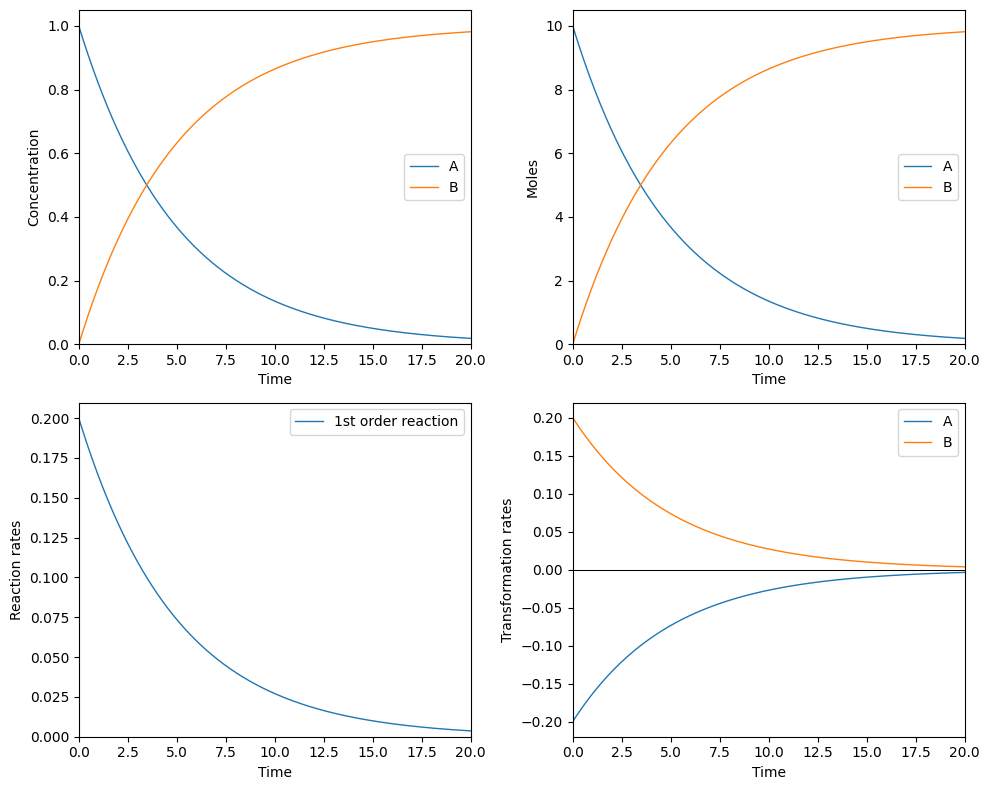

In [130]:
batch.run(20, plot=True);

As expected, the concentration of `A` decreases exponentially to 0, while `B` grows exponentially at the same speed until it reaches the initial concentration of `B`.

The number of moles, which is simply the concentration times the volume, is correctly shown as well.

The reaction speed starts at 0.2, as the rate speed suggests, and converges to 0 once the concentration of `A` converges to 0.

The transformation of `A` is negative, which is correct as the transformation rate is defined as the reaction rate times the specie's stoiechiometric coefficient. As expected, the transformation rate of `B` is the same as `A`, but positive since it is produced.

#### <a id='toc3_2_2_2_'></a>[Fed-batch](#toc0_)

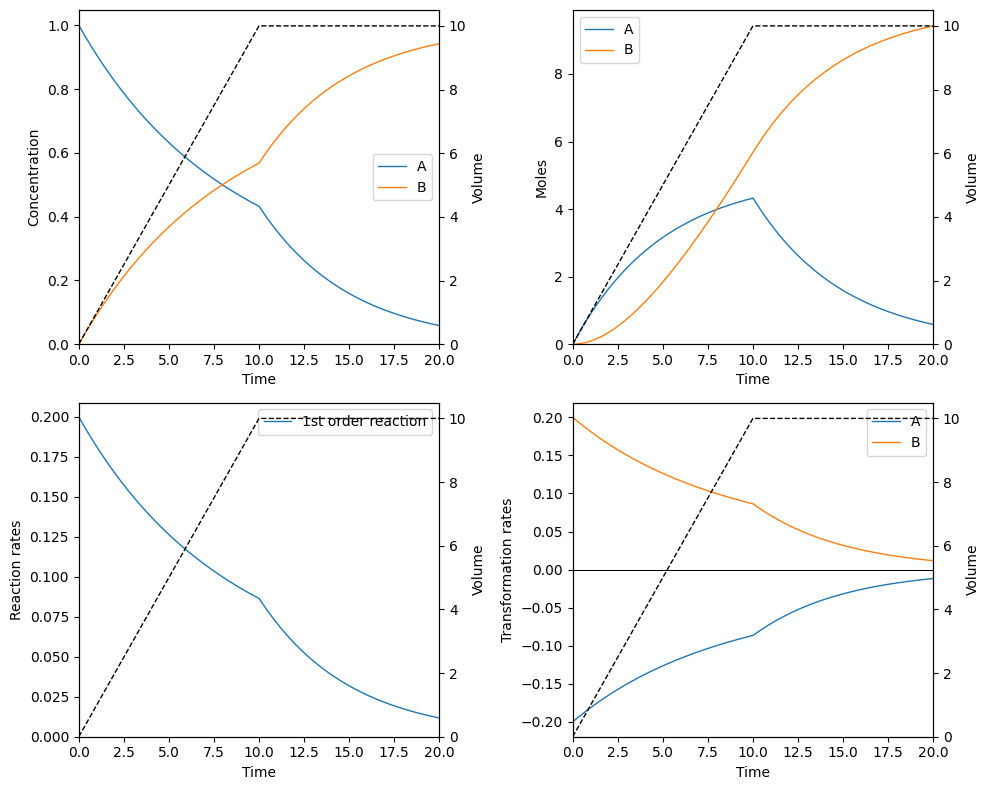

In [131]:
fedbatch.run(20, plot=True);

As expected, the concentrations of `A` starts to decrease due to its consumption, but because some is added to the reactor via the feed, its decrease is slower until the volume reaches its maximum. Then the feed is stopped and `A` starts to converge to 0. `B` follows a similar evolution but positively.

The number of moles is still the concentration times the volume, but since this time the volume is not constant, we see at first that the number of moles of `A` increase (the feed adding more moles of `A` than the reaction consumes) before decreasing once the feed is stopped. `B` is correctly increasing all the time, since it is never consumed.

The reaction rate is correctly higher when the feed is active, since the reaction rate depends of `A`.

The transformation rates are as expected the same for `A` and `B`, except that `A` is consumed while `B` is produced. When the feed is active, both transformation rates are higher due to a higher concentration of `A`.

#### <a id='toc3_2_2_3_'></a>[CSTR](#toc0_)

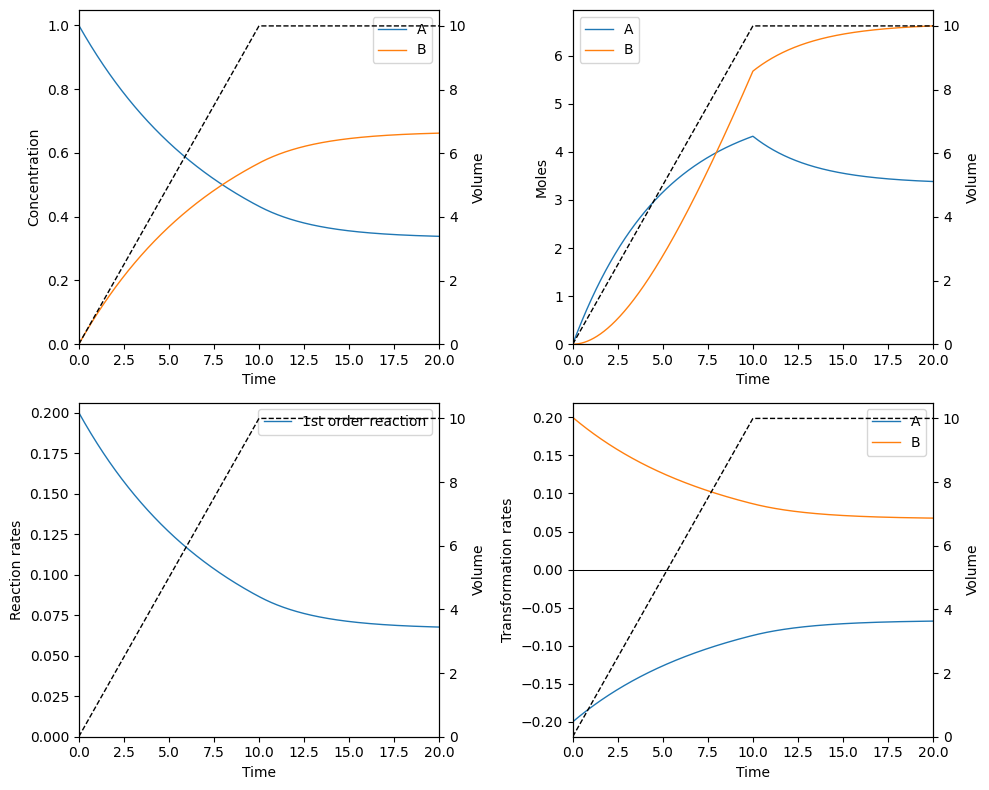

In [132]:
cstr.run(20, plot=True);

Contrary to the fed-batch reactor, the evolution of the concentration doesn't change when the final volume is reached: in this case, the feed continues but the outlet starts to take out the reaction mixture at the same rate as the feed. That means that the concentration of `A` won't converge to 0, contrary to the other reactors.

For the number of moles however, the influence of the change in volume can clearly be seen.

The reaction rate follows its expected curve: high at first since since the volume is low, the amount of `A` added by the feed is not diluted. Then it reaches it steady state value but never reaches 0 since `A` is continually added to the reactor.

For the transformation rates, the correct behavier is obtained: it is symmetric at 0 with respect to the x-axis, since 1 mole of `A` produces one mole of `B`.

#### <a id='toc3_2_2_4_'></a>[PFR](#toc0_)

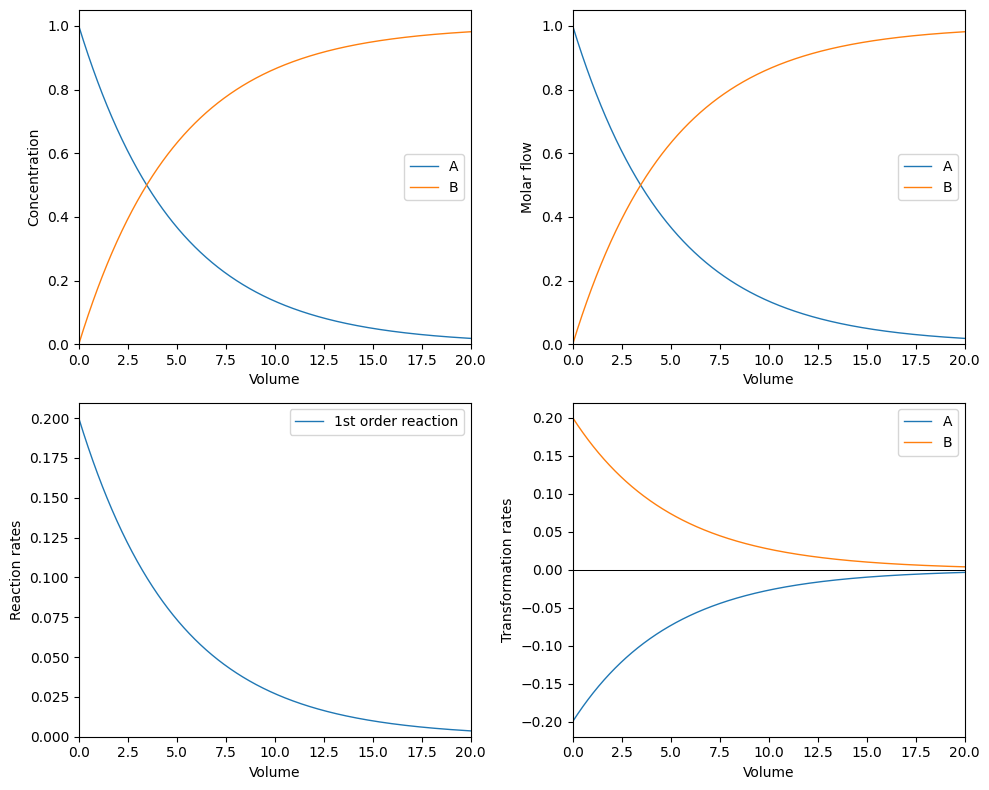

In [133]:
pfr.run(20, plot=True);

The PFR has the same behavier as the batch, except that it is not the evolution of the number of moles that is calculated, but the molar flow over the volume of the reactor. Thus, the concentrations, reaction rates and transformation rates are the same, but the molar flow is calculated by multiplying the concentration with the flow rate.

### <a id='toc3_2_3_'></a>[Simulation of a 2nd order reaction](#toc0_)

In [134]:
reaction_2st_order = Reaction("1st order reaction", ["A", "B", "C"],
                              [-1, -1, 1], "0.2*A*B")

initial_bulk_concentrations = {"A": 1, "B": 0.5, "C": 0}
inlet_concentrations = {"A": 1, "B": 0.5, "C": 0}

batch = Reactor("Batch", 10, [reaction_2st_order], initial_bulk_concentrations)
fedbatch = Reactor("Fed-batch", 10, [reaction_2st_order], initial_bulk_concentrations, 0,
                   1, inlet_concentrations)
cstr = Reactor("CSTR", 10, [reaction_2st_order], initial_bulk_concentrations, 0,
                1, inlet_concentrations)
pfr = Reactor("PFR", 10, [reaction_2st_order], {}, 0, 1, inlet_concentrations)

#### <a id='toc3_2_3_1_'></a>[Batch](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [135]:
# batch.run(20, plot=True);

#### <a id='toc3_2_3_2_'></a>[Fed-batch](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [136]:
# fedbatch.run(20, plot=True);

#### <a id='toc3_2_3_3_'></a>[CSTR](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [137]:
# cstr.run(20, plot=True);

#### <a id='toc3_2_3_4_'></a>[PFR](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [138]:
# pfr.run(20, plot=True);

### <a id='toc3_2_4_'></a>[Simulation of complex chemical reactions](#toc0_)

In [139]:
reaction1 = Reaction("Reaction 1", ['A', 'B', 'C'], [-1, -1, 1], '0.2*A**2*B')
reaction2 = Reaction("Reaction 2", ['B', 'C', 'D'], [-1, -1, 1], '0.75*B*C')
reaction3 = Reaction("Reaction 3", ['A', 'D'], [2, -0.5], '0.5*D**2')
reaction4 = Reaction("Reaction 4", ['C', 'B'], [-2, 2], '2*C')

initial_bulk_concentrations = {'A': 1, 'C': 0.5, 'B': 2, 'D': 1.5, 'E': 0.5}
inlet_concentrations = {'A': 1, 'C': 0.5, 'B': 2, 'D': 1.5, 'E': 0.5}

batch = Reactor("Batch", 10, [reaction1, reaction2, reaction3, reaction4],
                initial_bulk_concentrations)
fedbatch = Reactor("Fed-batch", 10, [reaction1, reaction2, reaction3,
                                     reaction4], initial_bulk_concentrations,
                                     0, 1, inlet_concentrations)
cstr = Reactor("CSTR", 10, [reaction1, reaction2, reaction3, reaction4],
               initial_bulk_concentrations, 0, 1, inlet_concentrations)
pfr = Reactor("PFR", 10, [reaction1, reaction2, reaction3, reaction4], {}, 0,
              1, inlet_concentrations)

#### <a id='toc3_2_4_1_'></a>[Batch](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [140]:
# batch.run(20, plot=True);

#### <a id='toc3_2_4_2_'></a>[Fed-batch](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [141]:
# fedbatch.run(20, plot=True);

#### <a id='toc3_2_4_3_'></a>[CSTR](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [142]:
# cstr.run(20, plot=True);

#### <a id='toc3_2_4_4_'></a>[PFR](#toc0_)

(The plot isn't shown to keep this document shorter, if you are interested in the result just uncomment the line)

In [143]:
# pfr.run(20, plot=True);

### <a id='toc3_2_5_'></a>[Find the steady-state](#toc0_)

In [144]:
reaction_1st_order = Reaction("1st order reaction", ["A", "B"], [-1, 1],
                              "0.2*A")

initial_bulk_concentrations = {"A": 1, "B": 0}
inlet_concentrations = {"A": 1, "B": 0}

batch = Reactor("Batch", 10, [reaction_1st_order], initial_bulk_concentrations)
fedbatch = Reactor("Fed-batch", 10, [reaction_1st_order],
                   initial_bulk_concentrations, 0, 1, inlet_concentrations)
cstr = Reactor("CSTR", 10, [reaction_1st_order], initial_bulk_concentrations,
               0, 1, inlet_concentrations)
pfr = Reactor("PFR", 10, [reaction_1st_order], {}, 0, 1, inlet_concentrations)

batch_ss = batch.find_steady_state()
batch_t_ss = batch_ss[0]
batch_concs_ss = batch_ss[1]

fedbatch_ss = fedbatch.find_steady_state()
fedbatch_t_ss = fedbatch_ss[0]
fedbatch_concs_ss = fedbatch_ss[1]

cstr_ss = cstr.find_steady_state()
cstr_t_ss = cstr_ss[0]
cstr_concs_ss = cstr_ss[1]

pfr_ss = pfr.find_steady_state()
pfr_t_ss = pfr_ss[0]
pfr_concs_ss = pfr_ss[1]

print(f"Batch: {batch_t_ss}, {batch_concs_ss}")
print(f"Fed-batch: {fedbatch_t_ss}, {fedbatch_concs_ss}")
print(f"CSTR: {cstr_t_ss}, {cstr_concs_ss}")
print(f"PFR: {pfr_t_ss}, {pfr_concs_ss}")

Batch: 26.526526526526528, {'A': 0.00496518304624458, 'B': 0.9950348169537555}
Fed-batch: 32.332332332332335, {'A': 0.004963162190000461, 'B': 0.9947461195213855}
CSTR: 30.0, {'A': 0.33357865264450287, 'B': 0.6664119088920528}
PFR: 26.526526526526528, {'A': 0.004965183057054567, 'B': 0.9950348169429453}


This returns the time at which the steady-state is reached as well as the concentrations of all species at that time. As expected, the batch and PFR returns similar values, as it will always be the case if their initial conditions are the same.

As expected, the fed-batch and CSTR take a longer time to reach steady-state, as they first have to reach their final volume and the wait for the reaction to finish.

(If you want to check visually that the time returned for the steady-state is correct, simply uncomment the lines below)

In [145]:
# batch.run(batch_t_ss, plot=True);
# fedbatch.run(fedbatch_t_ss, plot=True);
# cstr.run(cstr_t_ss, plot=True);
# pfr.run(pfr_t_ss, plot=True);

### <a id='toc3_2_6_'></a>[Find the time to reach a desired conversion](#toc0_)

In [146]:
desired_specie = "A"
desired_conversion = 0.5

batch_conv = batch.find_conversion(desired_specie, desired_conversion)
batch_conv_t = batch_conv[0]
batch_conv_concs = batch_conv[1]

fedbatch_conv = fedbatch.find_conversion(desired_specie, desired_conversion)
fedbatch_conv_t = fedbatch_conv[0]
fedbatch_conv_concs = fedbatch_conv[1]

cstr_conv = cstr.find_conversion(desired_specie, desired_conversion)
cstr_conv_t = cstr_conv[0]
cstr_conv_concs = cstr_conv[1]

pfr_conv = pfr.find_conversion(desired_specie, desired_conversion)
pfr_conv_t = pfr_conv[0]
pfr_conv_concs = pfr_conv[1]

print(f"Batch: {batch_conv_t}, {batch_conv_concs}")
print(f"Fed-batch: {fedbatch_conv_t}, {fedbatch_conv_concs}")
print(f"CSTR: {cstr_conv_t}, {cstr_conv_concs}")
print(f"PFR: {pfr_conv_t}, {pfr_conv_concs}")

Batch: 3.4784534284033786, {'A': 0.49872986273876563}
Fed-batch: 7.994080166252339, {'A': 0.4990344650794327}
CSTR: 7.987987987987988, {'A': 0.4992608045100626}
PFR: 3.4784534284033786, {'A': 0.49872986276445663}


As expected, the time needed to reach a conversion of 50 % for `A` is the same in the batch and PFR for the same initial conditions. The concentration returned is correctly 0.5 (with some degrees of imprecisions due to the time steps in the ODE solver).

As for the steady-state, a longer time is needed for the fed-batch and CSTR because it needs to fill-up first.

(Note: if you specify a conversion rate higher than the conversion reached at steady-state, an error will be raised to inform you of the maximum conversion possible. In the case of the CSTR, the maximal conversion is around 66 % because the feed continually add `A` inside the reactor)

(If you want to check visually that the time returned for the desired conversion is correct, simply uncomment the lines below)

In [147]:
# batch.run(batch_conv_t, plot=True);
# fedbatch.run(fedbatch_conv_t, plot=True);
# cstr.run(cstr_conv_t, plot=True);
# pfr.run(pfr_conv_t, plot=True);

# <a id='toc4_'></a>[Encountered difficulties](#toc0_)

**Lack of initial preparation**

At the beginning of the project, we didn't correctly planned and maybe started to quickly to the coding part, which resulted in some initial decisions taking a lot of time to correct down the line by refactoring the code. For example, we started by creating a class for each type of reactors, before realising that a lot of the code was actually similar. We then decided to put all these classes under one class `Reactor`, which made us loose some time who could have been used elsewhere.

**Use of multiple conditional statements**

The lack of good planning also led to a lot of "bad" fixes during coding. Every time a odd behaviors was discovered, a quick fix was to use an `if` statement and call it a day, which in the end makes the code hard to read and to debug. For exemple, under the one class `Reactor`, the user can create a batch without specifying an initial volume, but cannot create a fed-batch or CSTR without specifying it. We then used conditial statements as workarounds, but had we thought about this kind of problems first, surely a more elegant solution could have been found.

**Use of string expression for calculation**

Because the rate law has to be entered as a string, we had to find a way to interpret this expression mathematically. We found a solution using the `sympy` package, but that meant using dictionnaries, which made the code harder for us as we hadn't a lot of experience with treating correctly dictionnaries, and found that their utilisation rendered the code harder to read and less intuitive.

**Limitations of the `scipy.integrate.solve_ivp` function**

We choose to solve the ODE with the function `solve_ivp`, as we already encountered this function previously. However, we haven't found a way for this function to returns additional variable: outside the depend variables, we also wanted the function to return the reaction and transformation rates it calculated. The workaround we used was to calculate them again using the concentrations returned b y the function, which seems ineffective since they were already calculated in principle. That added a lot of duplicate code and rendered the code longer to execute.

**Intense computation**

To calculate the steady-state, we first tried to use `scipy.optimise.fsolve` to find the concentrations at which the evolution of the number of moles/molar flow is 0. However, this solution didn't work as the solution is dependent of the initial conditions, and we had no idea how to calculate the time at which the steady-state is reached either. The workaround was to run the simulation with a guess time, then check if the steady-state is reached, then run with a longer time iteratively until the steady-state is found. The problem is that this method needs a lot of computation, which renders the execution time long.

**Problem with finding the ideal reactors configuration**

We also wanted at first to implement a solution to calculate the ideal serial configuration of CSTR and PFR reactors to reach a desired conversion (in a similar method as the Levenspiel plot) to minimize the total volume of reactors. However, we then found that this method doesn't work for complex reaction, where the transformation rate of a specie doesn't uniquely depends on its concentration. Even if in theory we have found a way to calculate that, which basically was to run a lot of simulation until the optimal configuration was obtained, the running time would be really long so we haven't implement this functionnality until we find a better method.

# <a id='toc5_'></a>[Limitations of the package](#toc0_)

**Reaction phase**

This package is unable to simulate a gas phase reaction, where the molar flow can change drastically in a PFR reactor for example.

**Assume ideal mixing**

This package assume that all reactors are ideally mixed.

**Isothermal conditions**

This package only works for isothermal conditions, so it only work for non exothermic/endothermic reactions or if the reactor's temperature is perfectly managed.

# <a id='toc6_'></a>[Perspectives / ameliorations](#toc0_)

**Code refactoring**

The actual code is hard to read and to debug, due to the multiple conditional statements. Refactoring the code could improves drastically its readability and robustness.

**Reaction and transformation rates computation**

As discussed in the "Encountered difficulties" section, finding a way to directly returns the reaction and transformation rates from the `solve_ivp` function would allow for less duplicate code and better running time of the code.

**Implementing "Levenspiel" like functionnality**

This would allows the user to optimize the conversion of a specie with CSTR and PFR reactor in serial by minimizing the total volume for the reactors. This would be possible by running a simulation of both the PFR and CSTR, find the conversion where the gain of volume between the 2 is maximal, then run again a simulation where the concentrations in the inlet are the concentrations of the outlet of the previous reactor and do it iteratively until the desired conversion is reached. This demands for a lot of computational power, and surely a better way can be thought of.

**Optimizing for selectivity**

Sometimes, it is better to found the reactor parameters which will result in the best selectivity for a specie instead of the conversion, as the costs for purification usually represent 60% of the total process. This functionnality would be nice to implement.